# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открыть файл с данными и изучить общую информацию
### Предобработать данные
       
* определить пропущенные значения
* заполнить пропущенные значения
* дать пояснение, какие пропущенные значения обнаружены
* изменить типы данных
* пояснить, в каких столбцах изменены типы и почему

### Посчитать и добавить в таблицу  

* посчитать и добавить в таблицу: цена квадратного метра
* посчитать и добавить в таблицу: день недели, месяц и год публикации объявления
* посчитать и добавить в таблицу: этаж квартиры; варианты — первый, последний, другой
* посчитать и добавить в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

### Провести исследовательский анализ данных и выполнить инструкции                       

* изучить следующие параметры: площадь, цена, число комнат, высота потолков
* изучить время продажи квартиры
* убрать редкие и выбивающиеся значения.
* проанализировать факторы больше всего влияющие на стоимость квартиры цена квадратный метр, число комнат, удалённость от центра,этажность, от даты размещения: дня недели, месяца и года.
* выбрать 10 населённых пунктов с наибольшим числом объявлений, посчитать среднюю цену квадратного метра в этих населённых пунктах.
* выделить квартиры в Санкт-Петербурге — определить, какая область входит в центр.
* выделитить сегмент квартир в центре. Проанализировать эту территорию, и изучить следующие параметры: площадь, цена, число комнат, высота потолков, число комнат, этаж, удалённость от центра, дата размещения объявления, сделать выводы. Сравнить со всем городом.
### Вывод

# Описание данных:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = ',')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

### Вывод

### Поля с пропусками:
* ceiling_height высота потолков (м);  заполним, исходя из населенного пункта значенем медианы
---
* floors_total   всего этажей в доме; заполним пропущенные значения этажем, продаваемой квартиры, вероятно оставили пустыми, так как продаваемая кваритра находится на последнем этаже
---  
* living_area             жилая площадь в квадратных метрах(м²); вычислим отношение площади кухни к общей (через медиану по населенному пункту); на этот коэффициент умножим общую площадь
---  
* is_apartment            апартаменты (булев тип); - заменим на False
---  
* kitchen_area            площадь кухни в квадратных метрах (м²); вычислим отношение площади кухни к общей (через медиану по населенному пункту); на этот коэффициент умножим общую площадь
---  
* balcony                 число балконов; - поставим 0
---  
* locality_name           название населённого пункта; - заполним значением "Ленинградская область"
---  
* airports_nearest        расстояние до ближайшего аэропорта в метрах (м); в рассчетах не участвует, оставим пустым
---  
* cityCenters_nearest     расстояние до центра города (м); вычислим произведение цены квартиры к расстоянию до центра (через медиану по населенному пункту); этот коэффициент поделим на цену
---  
* parks_around3000        число парков в радиусе 3 км; оставим пустым, в рассчетах не участвует
---  
* parks_nearest           расстояние до ближайшего парка (м); оставим пустым, в рассчетах не участвует
---  
* ponds_around3000        число водоёмов в радиусе 3 км; оставим пустым, в рассчетах не участвует
---  
* ponds_nearest           расстояние до ближайшего водоёма (м); оставим пустым, в рассчетах не участвует
---  
* days_exposition         сколько дней было размещено объявление (от публикации до снятия); оставим пустым, незаполненные значения, говорят, что квартира еще продана


Пропуски, полагаю, прежде всего, связаны с разными источниками данных, а так же с неверным заполнением картографических данных в анкете пользователем.


### Шаг 2. Предобработка данных

### Преобразовываем типы следующих полей:

* first_day_exposition переводим в datatype
* is_apartment переводим в bool

#### Остальные поля преобразовываем методом to_numeric либо в int, либо во float, в зависимости от содержимого:
* balcony
* last_price
* total_area
* ceiling_height
* floors_total
* living_area 
* kitchen_area 
* airports_nearest 
* cityCenters_nearest
* parks_around3000 
* parks_nearest 
* ponds_around3000
* ponds_nearest
* days_exposition 

Заполняем поле количество этажей, полем этаж. Скорее всего это поле не заполнялось продавцом, так как продаваемый этаж и есть последний.

In [4]:
data['floors_total'] = data['floors_total'].fillna(data['floor']) 

Пустые значения в поле количество балконов заполняем нулями

In [5]:
data['balcony'] = data['balcony'].fillna(0)

Переводим дату публикации в режим datetime

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S', errors='coerce')

Пустые значения в поле "аппартаменты ли" заполняем занчениями False и меням тип стобца на bool 

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

Пропущенные значения в поле locality_name заполняем значением : Ленинградская область

In [8]:
data['locality_name'] = data['locality_name'].fillna('Ленинградская область')

Выгружаем название столбцов с типом данных object в список Index, выбрасываем из него единственный строковый -  locality_name, меняем тип столбцов с object на foals или Int, исходя из значений, использую  конструкцию try/except.

In [9]:
cols_obj = data.columns[data.dtypes.eq('object')]
cols_obj = cols_obj.drop('locality_name')
for col in cols_obj:   
    try:
        data[col] = pd.to_numeric(data[col], errors = 'coerce').astype('Int64')
    except TypeError:
        data[col] = pd.to_numeric(data[col], errors = 'coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null Int64
locality_name           23699 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000      

Заполняем пропущенные значения высота потолков исходя из медианы высоты потолков по каждому региону.

In [11]:
med_hei_ceil = data.groupby('locality_name')['ceiling_height'].median().to_dict()

data['ceiling_height'] = data['ceiling_height'].fillna(-1)

def fill_ceil(df):
    
    if df['ceiling_height'] == -1:
        return med_hei_ceil[df['locality_name']]
    else:
        return df['ceiling_height']
    
data['ceiling_height'] = data.apply(fill_ceil, axis=1)   

Заполняем пропущенные значения жилой площади, умножая общую площадь на высчитанный коэффициент (отношение медиан жилой площади к общей).

In [12]:
med_area = data.groupby('locality_name')['total_area'].median()

med_liv_area = (data.query('living_area.isna() == False').
                groupby('locality_name')['living_area'].median())

k_liv = (med_liv_area / med_area).to_dict()

data['living_area'] = data['living_area'].fillna(-1)

def fill_liv_area(df):
    if df['living_area'] == -1:
        return (k_liv[df['locality_name']] * df['total_area'])
    else:
        return df['living_area']
    
data['living_area'] = data.apply(fill_liv_area, axis=1)   

Заполняем пропущенные значения площади кухни, умножая общую площадь на высчитанный коэффициент (отношение медиан жилой площади к общей).

In [13]:
med_kitch_area = data.groupby('locality_name')['kitchen_area'].median()

k_kitch = (med_kitch_area / med_area).to_dict()

data['kitchen_area'] = data['kitchen_area'].fillna(-1)

def fill_kitch_area(df):
    if df['kitchen_area'] == -1:
        return (k_kitch[df['locality_name']] * df['total_area'])
    else:
        return df['kitchen_area']
    
data['kitchen_area'] = data.apply(fill_kitch_area, axis=1)   

Заполняем пропущенные значения расстояние до центра, поделив рассчитанный коэффициент (произведение медиан расстояние до центра на цену) на цену продажи.

In [14]:
med_centr_area = data.groupby('locality_name')['cityCenters_nearest'].median()

med_price_area = data.groupby('locality_name')['last_price'].median()

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

k_near = (med_centr_area * med_price_area).to_dict()

def fill_near(df):
    if df['cityCenters_nearest'] == -1:
        return (k_near[df['locality_name']] / df['last_price'])
    else:
        return df['cityCenters_nearest']
    
data['cityCenters_nearest'] = data.apply(fill_near, axis=1)   

Остались населенные пункты, где нет значений жилая площадь, площадь кухни, высота потолков, расстояние до центра. Заполним их значением медианы по всему датасету.  

In [15]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

data['cityCenters_nearest'] = (data['cityCenters_nearest'].
fillna(data['ceiling_height'].median())
                              )

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null Int64
locality_name           23699 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000    

### Шаг 3. Посчитайте и добавьте в таблицу

#### Считаем площадь квадратного метра

In [17]:
data['metr_price'] = data['last_price'] / data['total_area']

#### Добавляем поля день недели, месяц и год публикации объявления

In [18]:
data['name_day'] = data['first_day_exposition'].dt.weekday
data['month_name'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#### Категоризируем этаж квартиры на продажу

In [19]:
def floor_cat (df):
    if (df['floor'] == 1):
        return 'первый'
    if (df['floor'] == df['floors_total']):
        return 'последний'
    else:
        return 'другой'    
data['category_floor'] = data.apply(floor_cat, axis=1)

#### Находим отшения жилой площади и площади кухни к общей площади 

In [20]:
data['relat_liv_area'] = data['living_area'] / data['total_area']
data['relat_kitch_area'] = data['kitchen_area'] / data['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Гистограммы иcходя из кол-ва комнат, высоты потолков, общей площади и стоимости на момент продажи

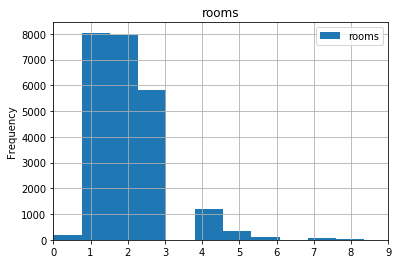

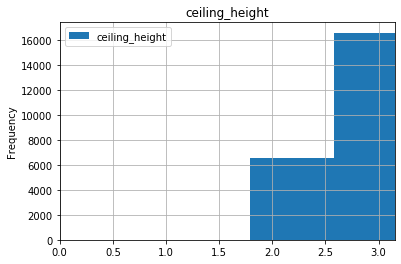

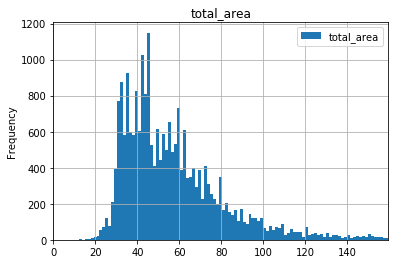

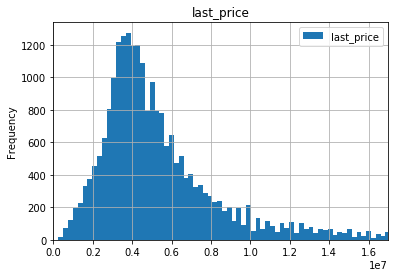

In [21]:
hist_four = ['rooms', 'ceiling_height', 'total_area',  'last_price']
i = 5
for graf in hist_four:
    i*=5
    iqr = (data[graf].quantile(0.75) - data[graf].quantile(0.25)) * 3
    (data.plot(y = graf, kind = 'hist', bins = i, title = graf,
               grid = True, xlim = (0, data[graf].quantile(0.75)+iqr))
    )

In [22]:
display('Средние значения')
for graf in hist_four:
    display(graf, data[graf].describe())

'Средние значения'

'rooms'

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

'ceiling_height'

count    23699.000000
mean         2.734136
std          1.009402
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

'total_area'

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

'last_price'

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

### Время продажи квартиры

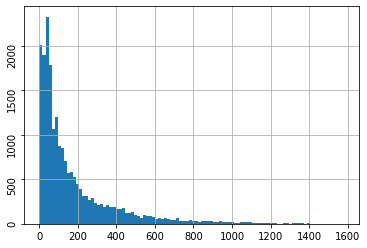

In [23]:
data['days_exposition'].hist(bins=100,grid=True, yrot = 90);

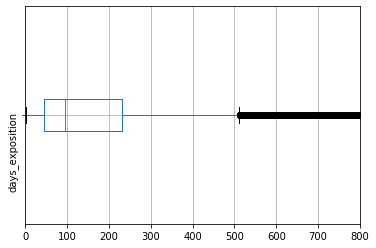

In [24]:
plt.xlim(0, 800)
data.boxplot('days_exposition', grid=True, vert=False, rot = 90);

In [25]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [26]:
display('Среднее занчение',data['days_exposition'].mean(),
'Медиана', data['days_exposition'].median()
       )

'Среднее занчение'

180.88863436982163

'Медиана'

95.0

#### Среднее почти в 2 раза больше медианы, в распределении длинный хвост высоких значений, начинающий с 500-ста дней. Первый квартиль находистя на уровне 45 дней.

#### Продажа квартиры в среднем занимает от 45 до 250 дней, более 500 дней -> продажи шли очень медленно; менее 45 дней -> продажи прошли очень быстро.

### Убираем редкие и выбивающиеся значения.

Кол-во дней до продажи. Отсечем значение 1100 дней, так как при этом показателе график стремится к нулю

In [27]:
good_sell_data = data.query('days_exposition <= 1100')

Подсчитали отношение значений медианы и среднего в поле Кол-во дней до продажи для каждого населенного пункта. Выведем населенные пункты с количеством объявлений больше 20 где среднее значение больше медианы более чем в два раза.

In [28]:
city_stat = good_sell_data.pivot_table(index='locality_name', values='days_exposition', aggfunc = ['median', 'mean', 'count'])

city_stat.columns = ['median', 'mean', 'count']

city_stat['diff'] = city_stat['mean'] / city_stat['median']

city_stat.query('diff > 2 & count > 20').sort_values(by = 'diff', ascending = False)

,median,mean,count,diff
locality_name,,,,
поселок Бугры,73.0,198.888889,45,2.724505
Отрадное,69.5,173.724138,58,2.499628
Волосово,114.0,279.516129,31,2.451896
Кингисепп,53.0,129.052632,95,2.434955
Кириши,47.0,113.086957,92,2.406105
городской посёлок Мга,77.0,171.666667,21,2.229437
деревня Кудрово,80.0,177.624161,298,2.220302
Сосновый Бор,45.0,99.594595,74,2.213213
Тихвин,45.0,94.575000,40,2.101667


Нет резко выбивающихся значений по населенным пунктам.

Кол-во комнат. В датасете есть объявления с 0 в поле кол-во комнат и одно значение 19. Исключим их из набора.

In [29]:
good_sell_data = good_sell_data.query('0 < rooms < 19')

Высота потолков. Есть объявления с высотой потолков, равной 100 метров, остальные меньше 15 метров. Исключим потолки-небоскребы из набора.

In [30]:
good_sell_data = good_sell_data.query('ceiling_height < 15')

Общая площадь. Есть объявления с общей площадью, равной 900 метров. Есть поле, где общая площадь 12 метров, предполагаю, что это коммуналка. Исключим бОльшую площадь из набора.

In [31]:
good_sell_data = good_sell_data.query('total_area < 900')

Цена продажи. Есть объявления с ценой, равной 763 млн руб. Исключим из набора квартиры более 200 млн.

In [32]:
good_sell_data = good_sell_data.query('last_price < 200000000')

### Зависит ли цена от количества комнат, общей площади и расстояния от центра

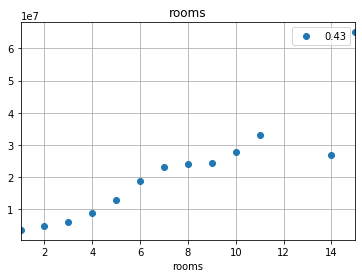

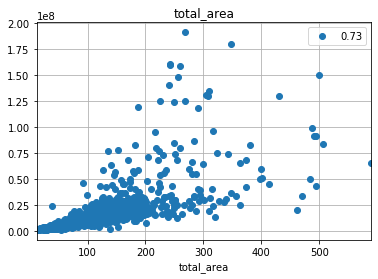

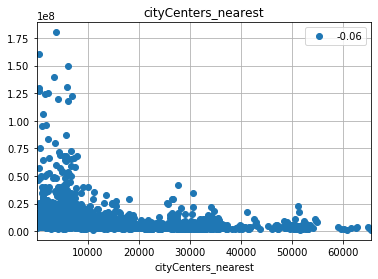

In [33]:
scatter_three = ['rooms', 'total_area',  'cityCenters_nearest']
for graf in scatter_three:
    
    cor = good_sell_data['last_price'].astype('float').corr(good_sell_data[graf]) 
    (good_sell_data.pivot_table(index = good_sell_data[graf], 
              values = 'last_price', aggfunc = 'median').
                  plot(y = 'last_price', style = 'o', grid = True, title = graf,
                       label = cor.round(2)
                    
              )
    )

Цена / Кол-во комнат. Корреляция в 0,43 говорит о наличии связи, однако не слишком сильной.

Цена / Общая площадь. Корреляция в 0,73 говорит о наличии сильной связи.

Цена / Расстояние до центра. Корреляция в -0,06 говорит об отсутствии связи как таковой.

### Зависит ли цена от этажности, даты подачи объявления

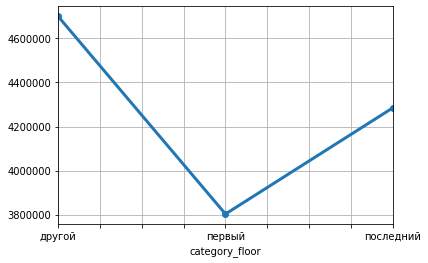

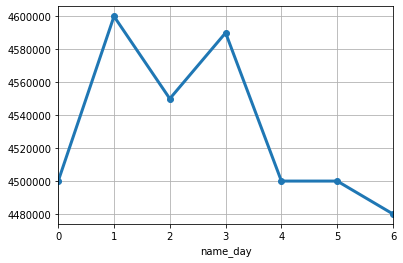

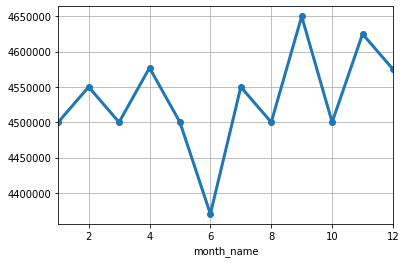

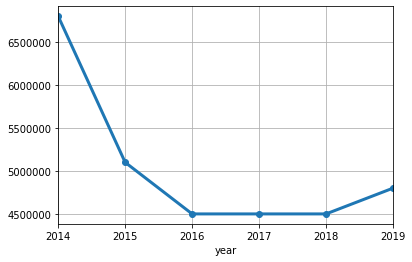

In [34]:
scatter_four = ['category_floor', 'name_day',  'month_name', 'year']

for graf in scatter_four:
    
    (good_sell_data.pivot_table(index = good_sell_data[graf], values = 'last_price', aggfunc = 'median').plot( 
               y = 'last_price', linewidth=3, style = '-o', grid = True, legend = False)
    );

Цена / этаж. На первый этаж цены ниже всех, из соображений безопасности, наверное. Дороже всех квартиры на промежуточных этажах.

Цена / день недели для подачи объявления. Во вторник и четверг выставляют в среднем самое дороге жилье - время принять взвешенное решение,  воскресенье самое дешевое - расслабленое состояние.

Цена / месяц подачи объявления. В сентябре и ноябре выставляют в среднем самое дороге жилье, в июне самое дешевое - сезонность.

Цена / год подачи объявления. В 2014 году цены на недвижимость были выше, затем, учитывая внешнеэкономические факторы, курс валют, цены на жилье подали. Только в 2019 начался наблюдаться рост.

### 10 населённых пунктов с наибольшим числом объявлений

In [35]:
must_sell_city = (good_sell_data.pivot_table(index = 'locality_name', values = 'last_price', 
                                             aggfunc = 'count').sort_values(by = 'last_price', ascending = False).head(10)
                    )
display(must_sell_city)

meter_price = (good_sell_data.
        pivot_table(index = 'locality_name', values = 'metr_price', aggfunc = ['median']))

meter_city = must_sell_city.merge(meter_price, on='locality_name', how='inner')

meter_city.columns = ['advertisement', 'price_for_meter']

display ('Населённые пункты с самой высокой стоимостью жилья',
         meter_city.sort_values(by = 'price_for_meter', ascending = False).head(3));
display ('Населённые пункты с самой низкой стоимостью жилья',
         meter_city.sort_values(by = 'price_for_meter', ascending = True).head(3));

,last_price
locality_name,
Санкт-Петербург,13393
посёлок Мурино,487
посёлок Шушары,403
Всеволожск,333
Колпино,307
Пушкин,303
посёлок Парголово,297
деревня Кудрово,282
Гатчина,267


'Населённые пункты с самой высокой стоимостью жилья'

,advertisement,price_for_meter
locality_name,,
Санкт-Петербург,13393,102873.563218
Пушкин,303,97938.144330
деревня Кудрово,282,91618.217054


'Населённые пункты с самой низкой стоимостью жилья'

,advertisement,price_for_meter
locality_name,,
Выборг,208,56960.594315
Всеволожск,333,65789.473684
Гатчина,267,67187.500000


Города с самой высокой стоимостью за квадратный метр : Санкт-Петербург, Пушкин, деревня Кудрово.

Города с самой низкой стоимостью за квадратный метр : Выборг, Всеволжск, Гатчина.

### Изучите предложения квартир в Санкт-Петербурге.

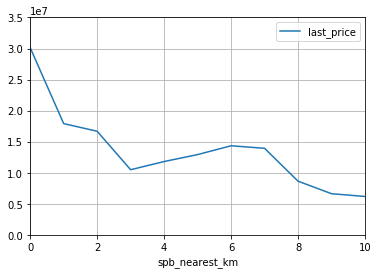

In [36]:
peterburg = 'Санкт-Петербург'
data_spb = good_sell_data.query('locality_name == @peterburg')
data_spb['spb_nearest_km'] = (data_spb['cityCenters_nearest'] / 1000).round(0).astype('Int64')

(data_spb.pivot_table(index = 'spb_nearest_km', values = 'last_price').
plot(grid = True, xlim = (0,10),ylim = (0,35000000))
);

In [37]:
data_centr_spb = data_spb.query('spb_nearest_km <= 7')

#### Исходя из графика центральная зона - до 7 километров

### Проанализировать центр Санкт-Петербурга и сравнить со всем городом. 
#### Параметры:

* #### площадь, цена, число комнат, высота потолков

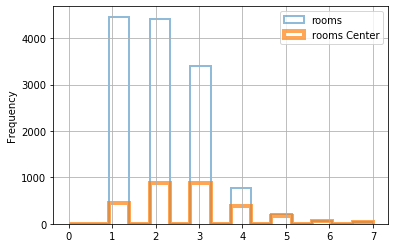

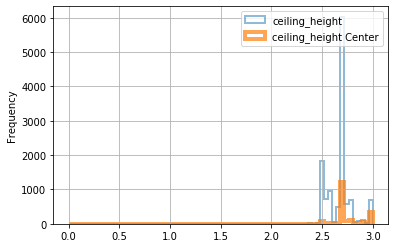

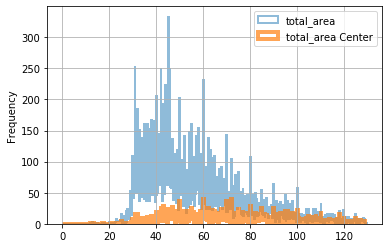

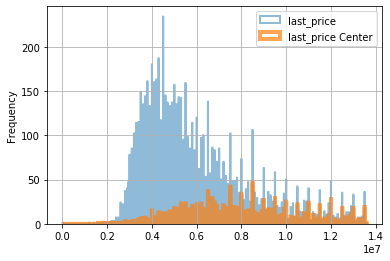

In [38]:
hist_spb = ['rooms','ceiling_height','total_area','last_price']
i = 15
for graf in hist_spb:
    
    
    iqr = (data[graf].quantile(0.75) - data[graf].quantile(0.25)) * 2
    
    ax = (data_spb.plot(kind='hist', y= graf, histtype='step', range=(0, data[graf].quantile(0.75) + iqr), bins=i,
                              linewidth=2, alpha=1.5, label = graf)

    );     
    (data_centr_spb[graf].plot(kind='hist', y= graf, histtype='step', range=(0, data[graf].quantile(0.75) + iqr), bins=i, 
                    linewidth=4, alpha=0.7, label = (graf + ' Center'), ax=ax, grid=True, legend=True)

    );
    i*=5

Кол-во комнат. В центре в основном квартиры двух и трех комнатные из-за исторической застройки. В остальном городе преобладает однокомнатные квартиры - за счет спальных районов. 

Высота потолков. Распределение высоты потолков примерно одинаковое, кроме кол-ва квартир с высотой 2.5 метра из-за массовой застройки.

Площадь квартир. В центре и во всем городе представлены квартиры с разной площадью. После 120 кв. метров графики сливаются -> здесь все квартиры в центре.

Стоимость квартир. Во всем городе преобладают квартиры стоимостью около 4 млн. В центре же средняя цена квартиры около 9 млн. руб.

In [39]:
display(
data_spb['last_price'].describe(),
data_centr_spb['last_price'].describe()
)

count    1.339300e+04
mean     7.440076e+06
std      8.864157e+06
min      1.219000e+04
25%      4.100000e+06
50%      5.300000e+06
75%      7.685993e+06
max      1.908700e+08
Name: last_price, dtype: float64

count    2.870000e+03
mean     1.357117e+07
std      1.663241e+07
min      1.600000e+06
25%      6.450000e+06
50%      8.750000e+06
75%      1.330810e+07
max      1.908700e+08
Name: last_price, dtype: float64

* #### факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

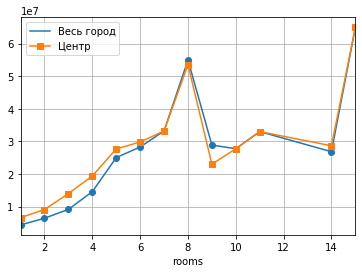

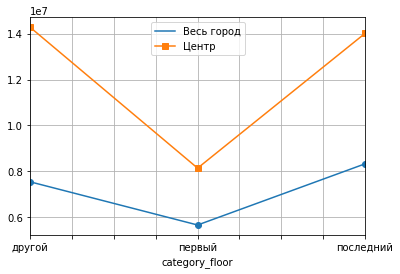

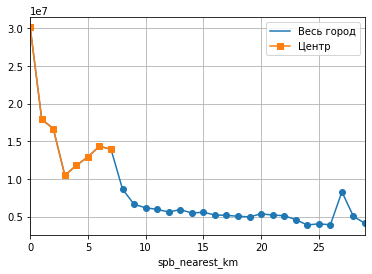

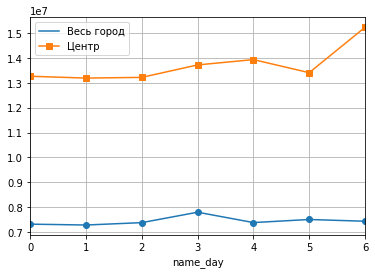

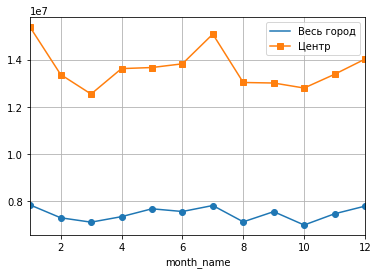

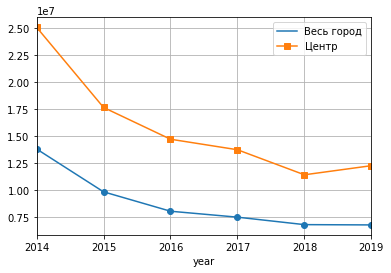

In [40]:
scatter_spb = ['rooms','category_floor','spb_nearest_km', 'name_day',  'month_name', 'year']
for graf in scatter_spb:
    
    ax = (data_spb.pivot_table(index = data_spb[graf], 
                values = 'last_price').plot( style = '-o',
               y = 'last_price', grid = True,label = 'Весь город')

    )     
    (data_centr_spb.pivot_table(index = data_centr_spb[graf], 
                values = 'last_price').plot(style = '-s',
               y = 'last_price', grid = True, ax = ax,label = 'Центр', mark_right = False)

    ) 

Цена / кол-во комнат. Как в центре, так и по всему городу Санкт-Петербургу читается связь больше комнат - дороже жилье. Выделяется дороговизной квартиры с 8 комнатами, возможно из-за 'числа'. 

Цена / этаж. Соотношение остается прежним - на первый этаж цены ниже всех. Дороже всех квартиры на промежуточных этажах.

Цена / расстояние до центра. Здесь совместный график отражает зависимость цены от расстояния. Есть скачок в цене квартир примерно за 27 километров от центра. Возможно, элитный район.

Цена / день недели для подачи объявления. В центре выставляют дорогое жилье чаще всего в пятницу и воскресенье, понедельник-среду квартиры ниже стоимостью. В целом по городу, квартиры дороже выставляли в среду, ниже стоимостью в понедельник, вторник

Цена / месяц подачи объявления. По городу дорогие квартиры выставляют зачастую в январе, июле и в декабре. В центре картина распределения схожая лишь пропорции больше.

Цена / год подачи объявления. В 2014 году цены на недвижимость были выше, затем, учитывая внешнеэкономические факторы, курс валют, цены на жилье подали. Только в 2019 начался наблюдаться рост за счет кварир в центре.

### Шаг 5. Общий вывод

#### В ходе анализа рынка недвижимости Ленинградской области было выполнено следующее:
##### * определены, изучены и заполнены, где это было необходимо пропущенные значения
##### * приведены данные к нужным типам исходя из содержимого
##### * посчитаны и добавлены в таблицу: цену квадратного метра, даты с разбивкой по периодам, категория этажей, соотношение жилой и площади кухни к общей площади
##### * построены гистограммы для параметров: площадь, цена, число комнат, высота потолков
##### * произведен анализ времени продажи квартиры, выявлено сколько обычно занимает продажа
##### * убраны редкие и выбивающиеся значения
##### * изучена зависимость цены от следующих факторов: квадратного метра, числа комнат, удалённости от центра, этаже расположена квартира, от даты размещения
##### * выбрано 10 населённых пунктов с наибольшим числом объявлений, выделены населённые пункты с самой высокой и низкой стоимостью жилья.
##### * определено расстояние от центра г.Санкт-Петербурга, где цена сильно меняется, таким образом вычислена центральная зона.
##### * выполнено сравнение центра города со всем Санкт-Петербургом по следующим параметрам: площадь, цена, число комнат, высота потолков, выделены факторы, влияющие на стоимость: число комнат, этаж, удалённость от центра, дата размещения объявления.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод